In [27]:
from Bio import PDB
import numpy as np
import os
import pandas as pd

In [58]:
# Get the list of all files and directories
path = "/Users/pressm/Documents/StatML/TCRProject/BestControl/"
dir_list = os.listdir(path)
for i, l in enumerate(dir_list):
    if l.startswith('.'):
        del dir_list[i]

In [59]:
len(dir_list)

431

In [60]:
dir_list

['5d7i_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb',
 '4ozf_unrelaxed_rank_004_alphafold2_ptm_model_5_seed_000.pdb',
 '5c08_unrelaxed_rank_002_alphafold2_ptm_model_1_seed_000.pdb',
 '5c09_unrelaxed_rank_004_alphafold2_ptm_model_1_seed_000.pdb',
 '3vxq_unrelaxed_rank_004_alphafold2_ptm_model_2_seed_000.pdb',
 '2esv_unrelaxed_rank_001_alphafold2_ptm_model_3_seed_000.pdb',
 '4udt_unrelaxed_rank_004_alphafold2_ptm_model_2_seed_000.pdb',
 '4nqe_unrelaxed_rank_002_alphafold2_ptm_model_3_seed_000.pdb',
 '4ozg_unrelaxed_rank_005_alphafold2_ptm_model_1_seed_000.pdb',
 '4ozf_unrelaxed_rank_003_alphafold2_ptm_model_1_seed_000.pdb',
 '3pqy_unrelaxed_rank_001_alphafold2_ptm_model_5_seed_000.pdb',
 '5c08_unrelaxed_rank_005_alphafold2_ptm_model_5_seed_000.pdb',
 '6fur_unrelaxed_rank_001_alphafold2_ptm_model_1_seed_000.pdb',
 '5d7i_unrelaxed_rank_002_alphafold2_ptm_model_2_seed_000.pdb',
 '3mff_unrelaxed_rank_005_alphafold2_ptm_model_5_seed_000.pdb',
 '5d7k_unrelaxed_rank_004_alphafold2_ptm

In [64]:
# Load the two structures
parser = PDB.PDBParser()

ids = []
rmsds=[]
for file in dir_list:
    id = file.split('_')[0]
    structure1 = parser.get_structure('structure1', '/Users/pressm/Documents/StatML/TCRProject/b_chain/'+ id +'.pdb')
    structure2 = parser.get_structure('structure2', '/Users/pressm/Documents/StatML/TCRProject/BestControl/'+ file)

# Extract the atom coordinates of the aligned residues
    residues1 = []
    residues2 = []
    for model1, model2 in zip(structure1, structure2):
        for chain1, chain2 in zip(model1, model2): 
            for residue1, residue2 in zip(chain1, chain2):
                if residue1.has_id('CA'):
                    residues1.append(residue1['CA'])
                if residue2.has_id('CA'):
                    residues2.append(residue2['CA'])
# Perform the structural superimposition
    l = len(residues1)
    superimposer = PDB.Superimposer()
    superimposer.set_atoms(residues1[l-40:l], residues2[l-40:l])
    superimposer.apply(residues2[l-40:l])
    ids.append(id)
    rmsds.append(superimposer.rms)
    

results = pd.DataFrame()
results['ID'] = ids
results['RMSD'] = rmsds

/opt/anaconda3/envs/gvhd/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 832
  warnings.warn(
/opt/anaconda3/envs/gvhd/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 833
  warnings.warn(
/opt/anaconda3/envs/gvhd/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 862
  warnings.warn(
/opt/anaconda3/envs/gvhd/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 863
  warnings.warn(
/opt/anaconda3/envs/gvhd/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'TER' at line 911
  warnings.warn(
/opt/anaconda3/envs/gvhd/lib/python3.9/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 912
  warnings.warn

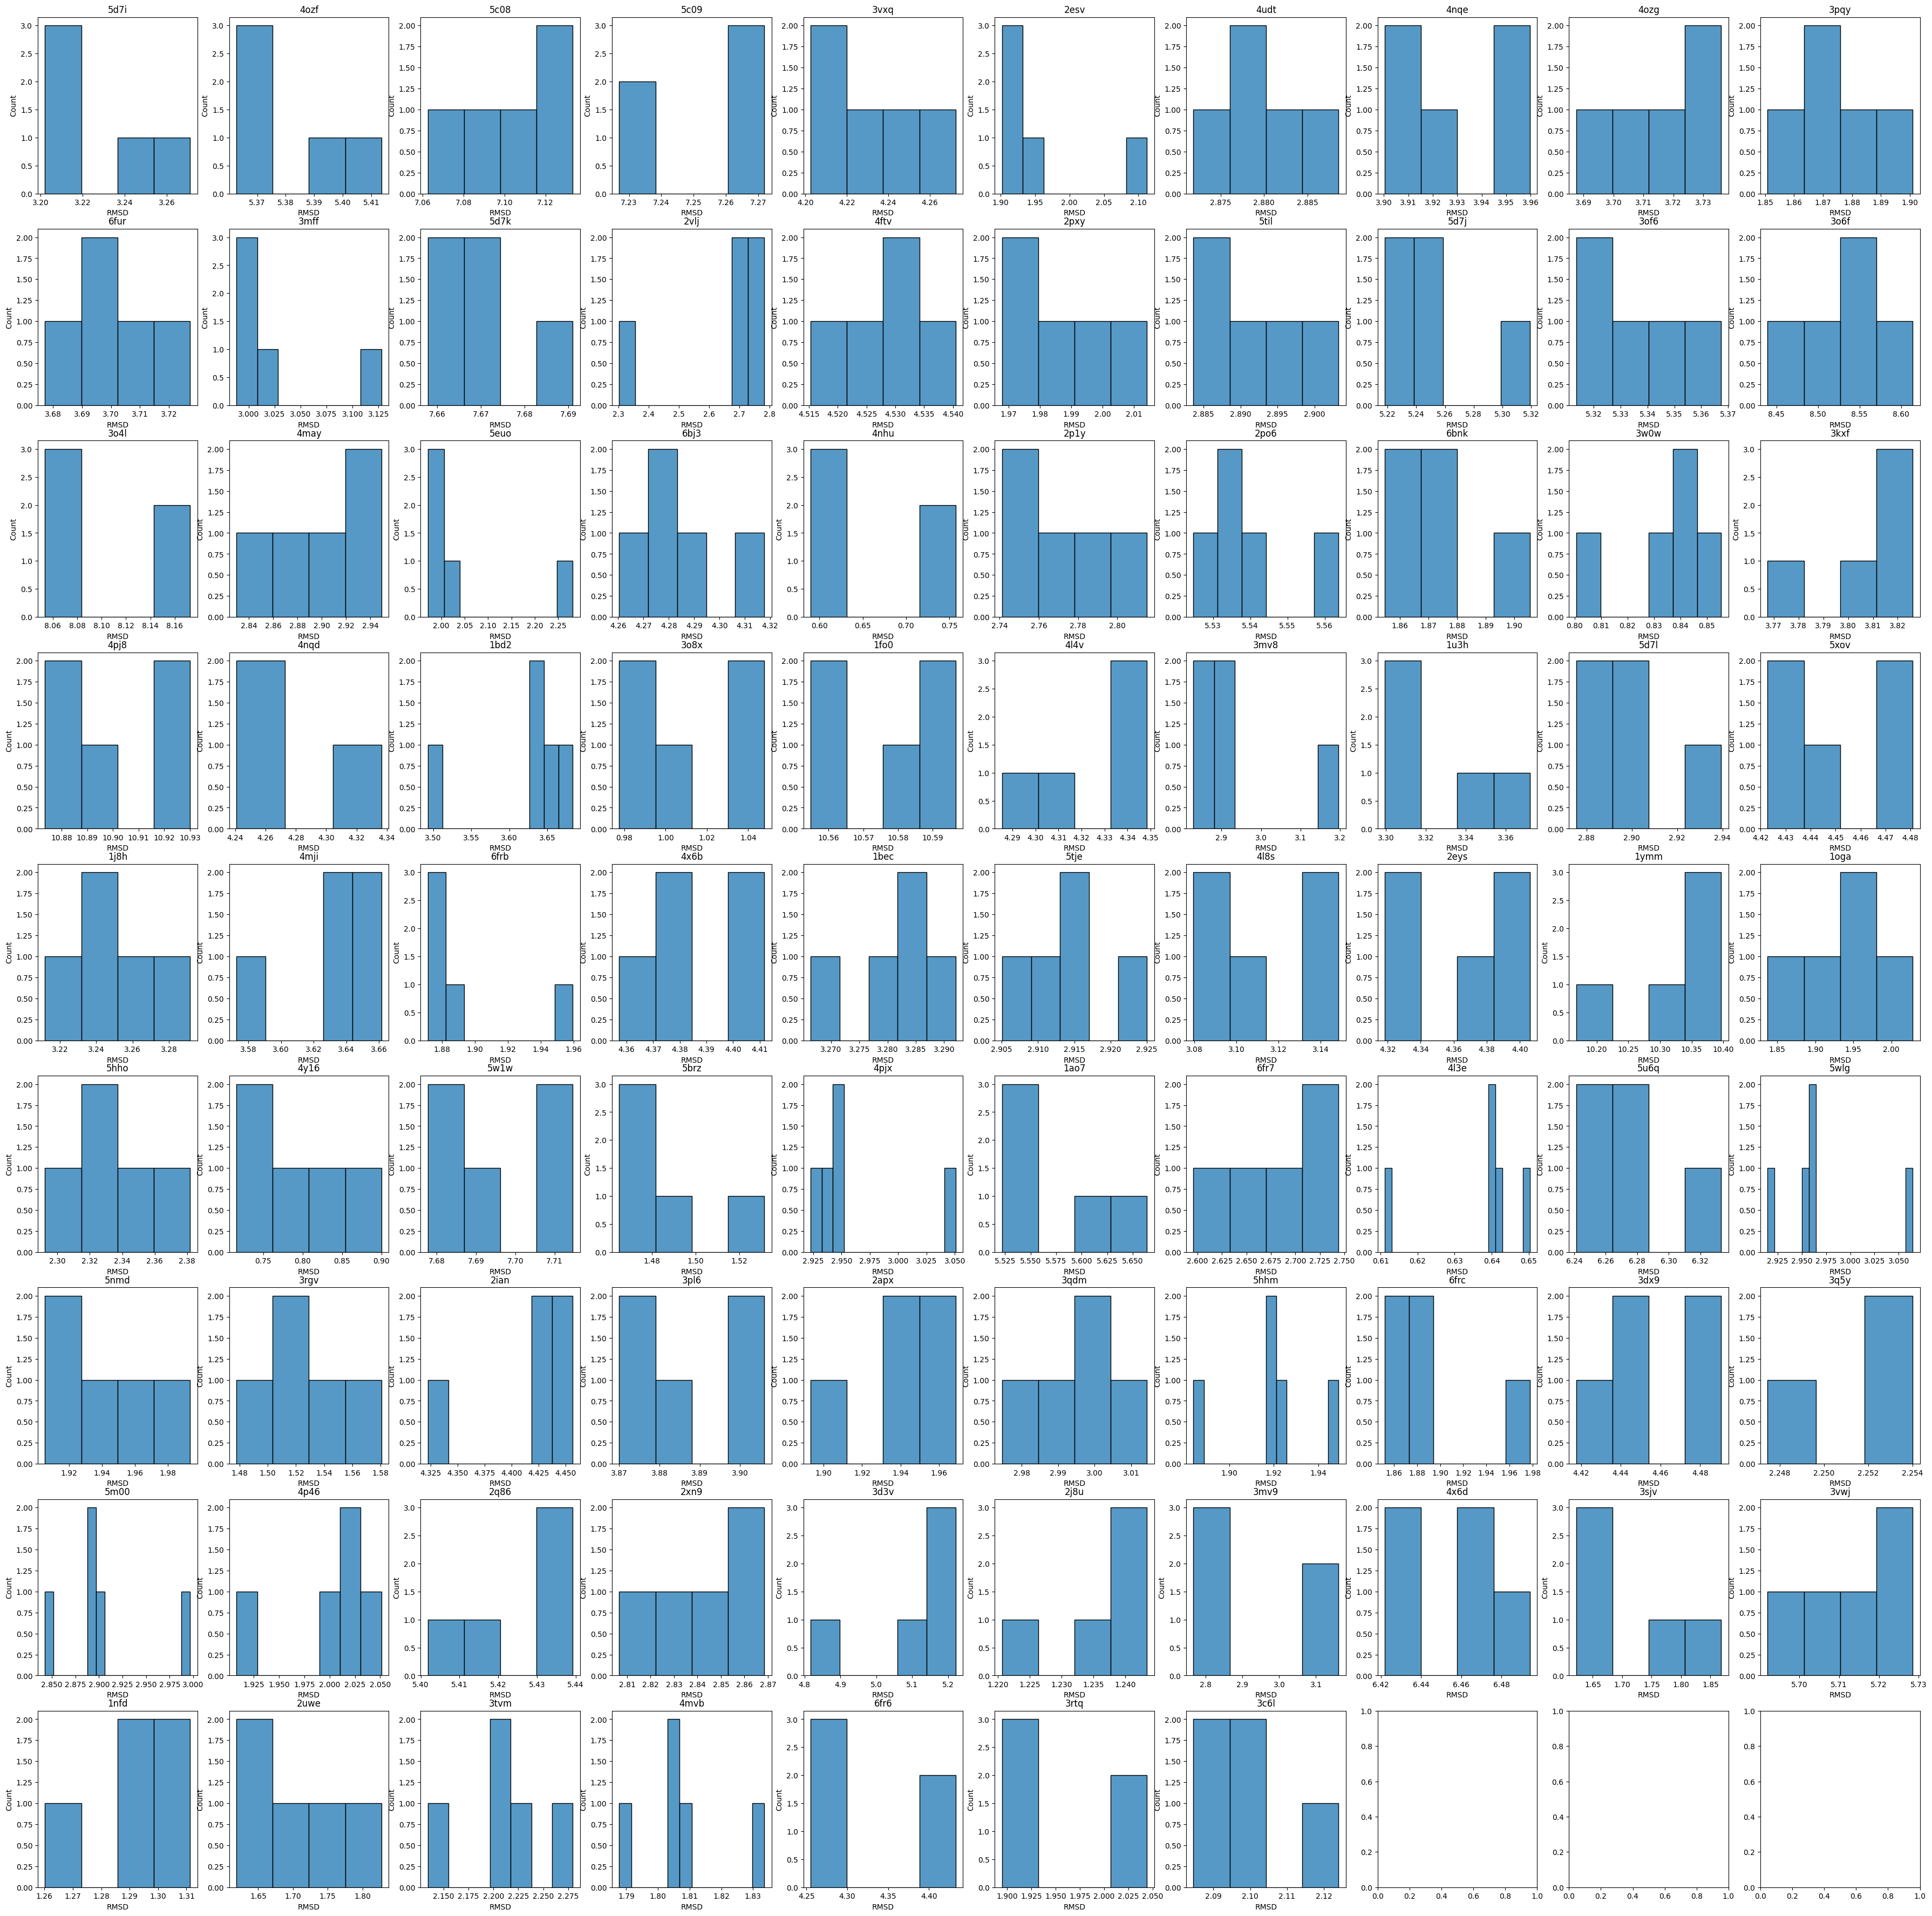

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(9,10, figsize = (45, 45))
axs = axs.flatten()
for i, ID  in enumerate(results['ID'].unique()):
    sns.histplot(results[results['ID'] == ID ], x = 'RMSD', ax = axs[i])
    axs[i].set_title(ID)